<font size='5'><b>WEDGE MODELS</b><font>

This workflow has been taking from the Agile website and does is no part belong to me. I followed the link ass they are offering users to do so and I just added a few extra bits and pieces to make things look different

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Making the earth Model

The first step for the wedge model generation is to create the earth model. For this I'm going to use a numpy function to create matrices:<br> 

np.tri(m, n, k)<br>

This will end up producing a box corresponding to the matrix m x n.

The paremeters that I will chose will be a 45m max thickness by 100ms deep<br>

To create the wedge I will use the following:<br>

model[:depth//3,:] = 0

In [68]:
length, depth = 45, 100
model = 1 + np.tri(depth, length, -depth//3, dtype=int)
model[:depth//3,:] = 0

Now with the earth model, I will just proceed to plot it:

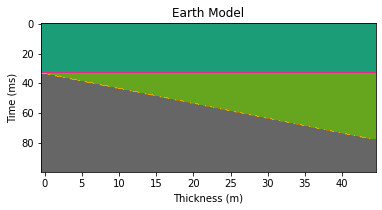

In [69]:
plt.imshow(model, cmap='Dark2', aspect=0.2)
plt.title('Earth Model')
plt.xlabel('Thickness (m)')
plt.ylabel('Time (ms)')
plt.show()

In [4]:
model[60]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [48]:
# Vp & RHOB
rocks = np.array([[2056, 2080],
                 [1850, 1900],
                 [2343, 2150]])

In [49]:
earth = rocks[model]

In [50]:
imp = np.apply_along_axis(np.product, -1, earth)

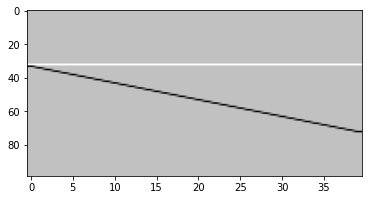

In [51]:
rc = (imp[1:, :] - imp[:-1,:]) / (imp[1:,:] + imp[:-1, :])

plt.imshow(rc, cmap='Greys', aspect=0.2)
plt.show()

In [52]:
import bruges

w = bruges.filters.ricker(duration=0.100, dt=0.001, f=40)

/Users/javierherbas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/bruges/filters/wavelets.py:204: FutureWarning: In future releases, return_t will be True by default.
  warnings.warn("In future releases, return_t will be True by default.", FutureWarning)


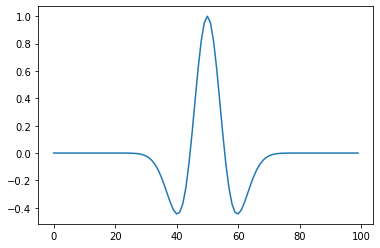

In [53]:
plt.plot(w)
plt.show()

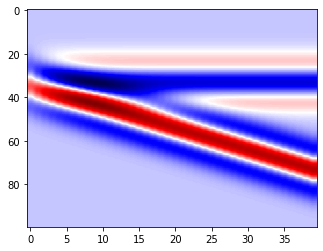

In [54]:
synthetic = np.apply_along_axis(lambda t: np.convolve(t, w, mode='same'), axis=0, arr=rc)

plt.imshow(synthetic, cmap='seismic', aspect=0.3)
plt.show()